<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) Project 3 is all about exploring this data and modeling interesting relationships with regression.

Project 3 is also much more open-ended than the previous projects. You are more responsible for finding things about the data that interest you, coming up with your own hypothesis about it, and reporting on the analysis you carry out. That being said, there are still specific requirements and restrictions on the type of models you will be constructing.

---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

**There is a lot of different data. You are _NOT_ expected to explore all of it or include all of it in analyses.** The point of the project is to focus on aspects of San Francisco that are particularly interesting to you from a modeling point of view. 

**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Choose a dataset or datasets of interest to you and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

In [127]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn import linear_model

from sklearn.metrics import mean_squared_error



%matplotlib inline
%config InlineBackend.figure_format ='retina'

ImportError: cannot import name model_selection

In [73]:
db_file = '/Users/ritapaixao/dsi-sf-3_rita/week3/dsi-sf-3/datasets/project3/SFocc.csv' 
SF_occ = pd.read_csv(db_file)

In [4]:
SF_occ.info()
# The results show that I don't have to 'clean' the data. Anyway, I have to transform date type into datetime 
# as I will work with this field to identify if the crime has occured in the summer or in the autumn. 
# I will try to find the hyphotesis that the Southern neighborhood has the same level of crime in the summer 
# as well as in the autumn. So, Varsha and I would be safe in our way from GA to the Caltrain station located within 
# Southern neighborhood.
# By the way, I've chosen this dataset because in 2014 SF has made a new distribution of neighborhood boundaries, so 
# if I use the data before 2015 the results will not reflect the current days.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156347 entries, 0 to 156346
Data columns (total 13 columns):
IncidntNum    156347 non-null int64
Category      156347 non-null object
Descript      156347 non-null object
DayOfWeek     156347 non-null object
Date          156347 non-null object
Time          156347 non-null object
PdDistrict    156347 non-null object
Resolution    156347 non-null object
Address       156347 non-null object
X             156347 non-null float64
Y             156347 non-null float64
Location      156347 non-null object
PdId          156347 non-null int64
dtypes: float64(2), int64(2), object(9)
memory usage: 15.5+ MB


In [7]:
SF_occ.groupby(['Category','PdDistrict']).count()

IncidntNum  Descript  DayOfWeek  Date  Time  \
Category      PdDistrict                                                
ARSON         BAYVIEW             62        62         62    62    62   
              CENTRAL             41        41         41    41    41   
              INGLESIDE           21        21         21    21    21   
              MISSION             50        50         50    50    50   
              NORTHERN            38        38         38    38    38   
              PARK                10        10         10    10    10   
              RICHMOND            11        11         11    11    11   
              SOUTHERN            39        39         39    39    39   
              TARAVAL             19        19         19    19    19   
              TENDERLOIN          20        20         20    20    20   
ASSAULT       BAYVIEW           1648      1648       1648  1648  1648   
              CENTRAL           1290      1290       1290  1290  1290   
              INGLESIDE         1447      1447       1447  1447  1447   
              MISSION           2022      2022       2022  2022  2022   
              NORTHERN          1453      1453       1453  1453  1453   
              PARK               590       590        590   590   590   
              RICHMOND           472       472        472   472   472   
              SOUTHERN          2090      2090       2090  2090  2090   
              TARAVAL            885       885        885   885   885   
              TENDERLOIN        1201      1201       1201  1201  1201   
BAD CHECKS    BAYVIEW              2         2          2     2     2   
              CENTRAL              1         1          1     1     1   
              INGLESIDE            3         3          3     3     3   
              MISSION              4         4          4     4     4   
              NORTHERN            11        11         11    11    11   
              RICHMOND             5         5          5     5     5   
              SOUTHERN             7         7          7     7     7   
              TARAVAL              4         4          4     4     4   
BRIBERY       BAYVIEW             11        11         11    11    11   
              CENTRAL              2         2          2     2     2   
...                              ...       ...        ...   ...   ...   
VEHICLE THEFT BAYVIEW            983       983        983   983   983   
              CENTRAL            551       551        551   551   551   
              INGLESIDE         1368      1368       1368  1368  1368   
              MISSION           1199      1199       1199  1199  1199   
              NORTHERN           945       945        945   945   945   
              PARK               640       640        640   640   640   
              RICHMOND           561       561        561   561   561   
              SOUTHERN           795       795        795   795   795   
              TARAVAL            789       789        789   789   789   
              TENDERLOIN         114       114        114   114   114   
WARRANTS      BAYVIEW            683       683        683   683   683   
              CENTRAL            611       611        611   611   611   
              INGLESIDE          475       475        475   475   475   
              MISSION           1182      1182       1182  1182  1182   
              NORTHERN           701       701        701   701   701   
              PARK               407       407        407   407   407   
              RICHMOND           209       209        209   209   209   
              SOUTHERN          1325      1325       1325  1325  1325   
              TARAVAL            282       282        282   282   282   
              TENDERLOIN         918       918        918   918   918   
WEAPON LAWS   BAYVIEW            330       330        330   330   330   
              CENTRAL            108       108        108   108   108   
           

In [13]:
SF_occ.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,110914565,WARRANTS,WARRANT ARREST,Friday,05/29/2015 12:00:00 AM,16:42,SOUTHERN,"ARREST, BOOKED",BRYANT ST / 8TH ST,-122.406971,37.772527,"(37.7725273607571, -122.406970988225)",11091456563010
1,150021318,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,01/07/2015 12:00:00 AM,18:20,SOUTHERN,NONE,0 Block of FOLSOM ST,-122.390556,37.790475,"(37.7904750361645, -122.39055604599)",15002131806244
2,150021324,NON-CRIMINAL,"LICENSE PLATE, RECOVERED",Wednesday,01/07/2015 12:00:00 AM,20:35,NORTHERN,NONE,300 Block of LARKIN ST,-122.416980,37.780977,"(37.7809770123705, -122.4169801816)",15002132471012
3,150021346,OTHER OFFENSES,LOST/STOLEN LICENSE PLATE,Wednesday,01/07/2015 12:00:00 AM,17:30,INGLESIDE,NONE,200 Block of TEDDY AV,-122.407583,37.714819,"(37.7148189169113, -122.407583029168)",15002134671010
4,150021653,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Thursday,01/08/2015 12:00:00 AM,01:03,TENDERLOIN,"ARREST, BOOKED",LEAVENWORTH ST / GOLDEN GATE AV,-122.413870,37.781862,"(37.7818621883021, -122.413869632554)",15002165365016


In [82]:
from datetime import datetime

SF_occ['Date'] = pd.to_datetime(SF_occ['Date'])
summer_mask = ((SF_occ['Date'] > '2015-6-21') & (SF_occ['Date'] <= '2015-9-20'))
SF_occ['Summer'] = summer_mask

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
156317    False
156318    False
156319    False
156320    False
156321     True
156322     True
156323     True
156324    False
156325    False
156326    False
156327    False
156328    False
156329    False
156330    False
156331    False
156332    False
156333    False
156334    False
156335    False
156336    False
156337    False
156338    False
156339    False
156340    False
156341    False
156342    False
156343    False
156344    False
156345    False
156346    False
Name: Summer, dtype: boo

In [91]:
SF_occ[(SF_occ['Category'] == "ASSAULT")]['Summer'].sum()

3441

In [90]:
fall_mask = ((SF_occ['Date'] > '2015-9-21') & (SF_occ['Date'] <= '2015-12-21'))
SF_occ['Fall'] = fall_mask
SF_occ[(SF_occ['Category'] == "ASSAULT")]['Fall'].sum()

3063

In [103]:
ass_mask = (SF_occ['Category'] == "ASSAULT")
SF_occ['cat_ass'] = ass_mask

In [104]:
SF_occ.shape

(156347, 16)

In [105]:
SF_occ.columns

Index([u'IncidntNum', u'Category', u'Descript', u'DayOfWeek', u'Date', u'Time',
       u'PdDistrict', u'Resolution', u'Address', u'X', u'Y', u'Location',
       u'PdId', u'Summer', u'Fall', u'cat_ass'],
      dtype='object')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- Visualize the evaluation metrics of your analysis in clear charts.
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


{'boxes': [<matplotlib.lines.Line2D at 0x12157a550>,
 'caps': [<matplotlib.lines.Line2D at 0x12155c3d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x11ab216d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11ab21090>,
 'whiskers': [<matplotlib.lines.Line2D at 0x12157a690>,
  <matplotlib.lines.Line2D at 0x11ab33990>]}

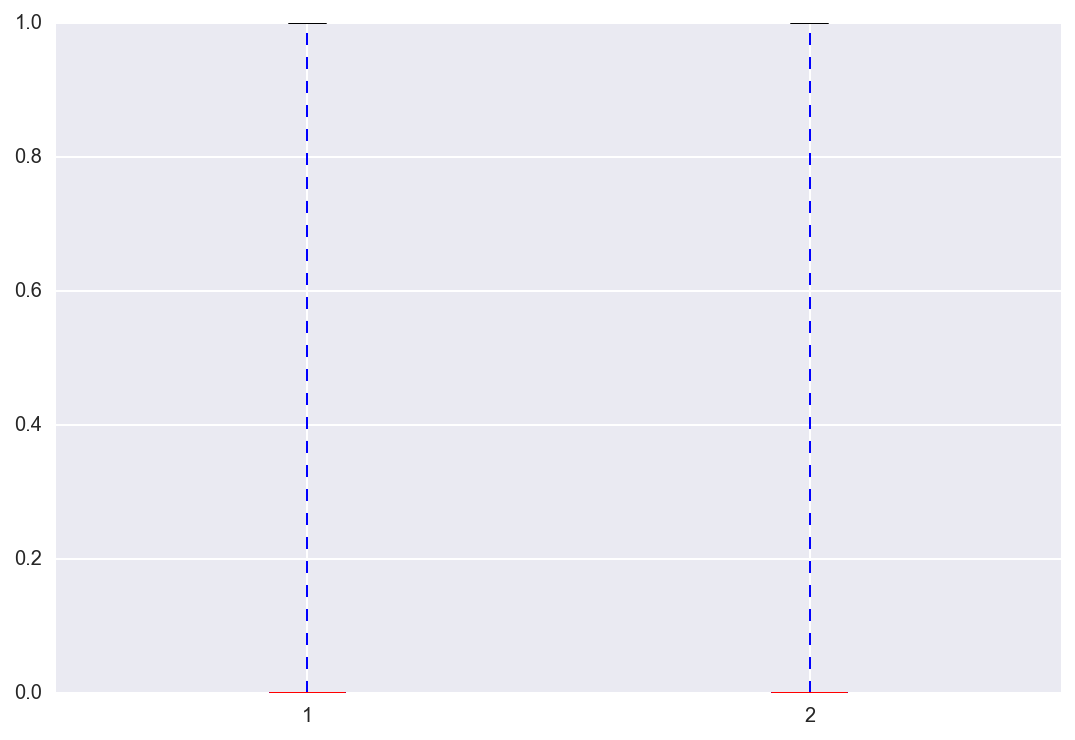

In [113]:
y = SF_occ.iloc[:,-1] #cat_ass
X = SF_occ.iloc[:,-3:-1] # Summer and Fall
#2) I did the box plot but the results would be obvious as the information is boolean. There is no outlier.

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
plt.boxplot((X,y))



In [114]:
lr = linear_model.LinearRegression() 

model = lr.fit(X, y)
predictions = lr.predict(X)
predictions.shape

(156347,)

In [120]:
print predictions.mean()
r2 = model.score(X, y)
print "MSE:", mean_squared_error(y, predictions)
print "Rˆ2: ", r2
print "Coefficients: ",model.coef_
print "Intercept: ", lr.intercept_

0.0837751923606
MSE: 0.0767544143556
Rˆ2:  3.25071700887e-05
Coefficients:  [ 0.00382974  0.00121497]
Intercept:  0.0825147347741


In [129]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [136]:
model = lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

print predictions.mean()
r2 = model.score(X_train, y_train)
#print "MSE:", mean_squared_error(y_train, predictions)
print "Rˆ2: ", r2
print "Coefficients: ",model.coef_
print "Intercept: ", lr.intercept_

 0.0841624925893
Rˆ2:  5.40003802265e-05
Coefficients:  [ 0.00475693  0.00025855]
Intercept:  0.0828900471048


In [138]:
lr.summary

AttributeError: 'LinearRegression' object has no attribute 'summary'

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2.2 Explain $R^2$ vs. mean squared error (MSE)

---

1. If you have negative $R^2$ values in cross-validation, what does this mean? 
2. Why can $R^2$ only be negative when the model is tested on new data?

In [ ]:
# Q1. Both of them are a measurement about how your model fits your data, but Rˆ2 measures how your regression model  
# fits with the data in the sample, so if the Rˆ2 is negative or small means that your model 
# is not a good fit to your sample or there are many residuals to be treated.
# MSE has the same concept but its analysis is based on population. In other words you have to use 
# regularization to try to make your model fits better your data if this scores points you a real low value.

# Q2. Because R2 can be explained by 1- (Sum Sq Residuals/Sum Sq Total), when the Sum Sq Residuals are greater than 
#Sum Sq Total the result of Rˆ2 will be negative. MSE has the units squared, so it is not possible to get a negative 
#value.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine multiple sources of data and evaluate a model with regularized regression

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**

1. Use _NEW_ sources of data for this section. It should not be related to your analysis/hypothesis from section 1.
- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. Find the optimal hyperparameters (alpha, l1_ratio) using gridsearch.
- Report on which model is best, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another, different analysis and report on it

---

1. Combining multiple sources of data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.

This section is just another analysis like the first sections, but is more open-ended in what models you decide to build and why. Don't feel obligated to try every out every regularized regression model (though it doesn't hurt). 


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.2 Ploting GridSearch with Lasso, Ridge, or Elasticnet
---
1. Using the gridsearch results, plot your score in relation to your parameters.
1. Plot the effect on your coefficients given alpha.
1. Plot any other parameter change to visualize the impact of any other hyperparameter.

It's helpful to understand the impact of parameters used in Gridsearch, and that you are comfortable working with the data that is generated for reporting to explore the results visually.

In [141]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

#lambda(alpha in the code) has to be low to increase the importance of Beta (our coefficient wich multiple 
# predictors (x)) in the targets (y). With real low values for lambda you remove the error and increase he significance
# of the predictors in the targets

ridge_targ = RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100], cv=3)
ridge_targ.fit (X_train, y_train)

y_train_ridge_pred = ridge_targ.predict(X_train)
y_test_ridge_pred = ridge_targ.predict(X_test)

print "Training: ", mean_squared_error(y_train_ridge_pred, y_train) ** .5
print "Testing: ", mean_squared_error(y_test_ridge_pred, y_test) ** .5 
# here we regularized really well the model and the results are closer, let's see if Lasso will work better

Training:  0.277625066644
Testing:  0.275693199912


In [144]:
lasso_targ = LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100], cv=3)
lasso_targ.fit (X_train, y_train)

y_train_lasso_pred = lasso_targ.predict(X_train)
y_test_lasso_pred = lasso_targ.predict(X_test)

print "Lambda: ", (1/lasso_targ.alpha_)
print "Training: ", mean_squared_error(y_train_lasso_pred, y_train) ** .5
print "Testing: ", mean_squared_error(y_test_lasso_pred, y_test) ** .5 
# Conclusion: results of both regularization are similar. Even though the values of MSE show me that my model is not
# fitting well even with the regularization.

Lambda:  10000.0
Training:  0.277625180634
Testing:  0.27569235672


In [143]:
elast_targ = ElasticNetCV(l1_ratio=[0.1, 0.2, 0.3, 0.4, 0.5, 0.95, 0.99, 1], n_alphas= 300, cv=3)
elast_targ.fit (X_train, y_train)

y_train_elast_pred = elast_targ.predict(X_train)
y_test_elast_pred = elast_targ.predict(X_test)

print "Training: ", mean_squared_error(y_train_elast_pred, y_train) ** .5
print "Testing: ", mean_squared_error(y_test_elast_pred, y_test) ** .5 
# Conclusion: results are similar to Ridge and Lasso regularization.


Training:  0.277625105714
Testing:  0.275693085186


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Select San Francisco data of your choice and construct a regularized regression model (this can be data from an earlier analysis if you like). Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $\lambda1$ and $\lambda2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.


**Devise of and implement a penalized regression for San Francisco data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?

## Statistics, Biases, and Hypothesis Testing

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Biases 

---
A new food ordering smartphone app incentivizes its users to invite their friends by offering them free orders for each friend that signs up
- What biases are being caused here?
- How would you measure the success of such a program?
- Rephrase this question to be unbiased
- Many people have said that there is a need for stricter laws on dangerous weapons. Do you agree?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Hypothesis Testing 

---

For the health/mortality data that Ferris used in class: 
- Generate summary statistics, histogram plots, cdf plots, and confidence intervals for two columns of your choice and a correlation matrix across all
- Using what you generated, provide short summaries of each column describing the data
- Is there a difference in mortality between smokers, nonsmokers?
- If national average weight is 85 pounds, is our weight average significantly different?
- Until now, we’ve only asked is it different. This is called a two sided test. 
    - What if we want to know if its less than or greater than? This is called a one sided test. We can calculate this from the result of a two sided. You divide your p value in half and check if your t statistic is positive or negative Greater than: p/2 < confidence level and t > 0 and Less-than: p/2 < confidence level and t < 0.
    
    - If national average weight is 85 pounds, is our weight average statistical significantly less?